Base de Dados: https://www.tesourotransparente.gov.br/ckan/dataset

In [1]:
import pandas as pd
import yfinance as yf
import cufflinks as cf
cf.go_offline()
from plotly.subplots import make_subplots

# pd.set_option("display.max_colwidth", 150)
# pd.set_option("display.min_rows", 20)

import matplotlib
# matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)
import plotly.express as px

import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = 'png'  ## comentar se quiser grafico interativo

In [2]:
def busca_titulos(tipo=None):
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  if tipo is None:
    return df.sort_index()
  else:
      return df[df.index.get_level_values(0) == tipo]

busca por tipo

In [3]:
busca_titulos('Tesouro Selic')

Taxa Compra Manha  Taxa Venda Manha  \
Tipo Titulo   Data Vencimento Data Base                                         
Tesouro Selic 2026-03-01      2024-06-05               0.04              0.05   
              2027-03-01      2024-06-05               0.09              0.10   
              2024-09-01      2024-06-05               0.01              0.02   
              2029-03-01      2024-06-05               0.15              0.16   
              2025-03-01      2024-06-05               0.00              0.01   
...                                                     ...               ...   
              2015-03-07      2014-08-29               0.00              0.01   
              2017-03-07      2014-08-28              -0.01              0.02   
              2015-03-07      2014-08-28               0.00              0.01   
              2017-03-07      2014-08-27              -0.01              0.02   
              2015-03-07      2014-08-27               0.00              0.01   

                                          PU Compra Manha  PU Venda Manha  \
Tipo Titulo   Data Vencimento Data Base                                     
Tesouro Selic 2026-03-01      2024-06-05         14911.36        14902.84   
              2027-03-01      2024-06-05         14884.05        14874.06   
              2024-09-01      2024-06-05         14920.09        14913.80   
              2029-03-01      2024-06-05         14813.93        14801.00   
              2025-03-01      2024-06-05         14920.27        14913.24   
...                                                   ...             ...   
              2015-03-07      2014-08-29          6306.08         6305.76   
              2017-03-07      2014-08-28          6305.08         6300.32   
              2015-03-07      2014-08-28          6303.49         6303.16   
              2017-03-07      2014-08-27          6302.49         6297.74   
              2015-03-07      2014-08-27          6300.91         6300.57   

                                          PU Base Manha  
Tipo Titulo   Data Vencimento Data Base                  
Tesouro Selic 2026-03-01      2024-06-05       14902.84  
              2027-03-01      2024-06-05       14874.06  
              2024-09-01      2024-06-05       14913.80  
              2029-03-01      2024-06-05       14801.00  
              2025-03-01      2024-06-05       14913.24  
...                                                 ...  
              2015-03-07      2014-08-29        6303.14  
              2017-03-07      2014-08-28        6297.72  
              2015-03-07      2014-08-28        6300.55  
              2017-03-07      2014-08-27        6295.12  
              2015-03-07      2014-08-27        6297.96  

[18812 rows x 5 columns]

busca todos

In [4]:
titulos = busca_titulos()
titulos

Taxa Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                       
Tesouro Educa+ 2030-12-15      2023-08-01               5.06   
                               2023-08-02               5.05   
                               2023-08-03               5.02   
                               2023-08-04               5.02   
                               2023-08-07               4.98   
...                                                      ...   
Tesouro Selic  2029-03-01      2024-06-17               0.16   
                               2024-06-18               0.16   
                               2024-06-19               0.16   
                               2024-06-20               0.16   
                               2024-06-21               0.16   

                                           Taxa Venda Manha  PU Compra Manha  \
Tipo Titulo    Data Vencimento Data Base                                       
Tesouro Educa+ 2030-12-15      2023-08-01              5.18          3248.87   
                               2023-08-02              5.17          3251.07   
                               2023-08-03              5.14          3256.24   
                               2023-08-04              5.14          3257.13   
                               2023-08-07              5.10          3263.78   
...                                                     ...              ...   
Tesouro Selic  2029-03-01      2024-06-17              0.17         14858.88   
                               2024-06-18              0.17         14864.46   
                               2024-06-19              0.17         14870.05   
                               2024-06-20              0.17         14875.98   
                               2024-06-21              0.17         14881.92   

                                           PU Venda Manha  PU Base Manha  
Tipo Titulo    Data Vencimento Data Base                                  
Tesouro Educa+ 2030-12-15      2023-08-01         3230.41        3230.41  
                               2023-08-02         3232.62        3232.62  
                               2023-08-03         3237.76        3237.76  
                               2023-08-04         3238.49        3238.49  
                               2023-08-07         3245.29        3245.29  
...                                                   ...            ...  
Tesouro Selic  2029-03-01      2024-06-17        14845.98       14845.98  
                               2024-06-18        14851.56       14851.56  
                               2024-06-19        14857.13       14857.13  
                               2024-06-20        14863.07       14863.07  
                               2024-06-21        14869.00       14869.00  

[144250 rows x 5 columns]

tipos

In [5]:
titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()

['Tesouro Educa+',
 'Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Renda+ Aposentadoria Extra',
 'Tesouro Selic']

historico das taxas do tesouro  IPCA+ com Juros Semestrai 2035

In [6]:
titulos.loc[('Tesouro IPCA+ com Juros Semestrais','2035-01-01'):('Tesouro IPCA+ com Juros Semestrais','2035-12-30')]

Taxa Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                       
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12               8.04   
                                                   2006-04-13               8.05   
                                                   2006-04-17               8.09   
                                                   2006-04-18               8.10   
                                                   2006-04-19               8.09   
...                                                                          ...   
                                                   2024-06-17               6.36   
                                                   2024-06-18               6.38   
                                                   2024-06-19               6.37   
                                                   2024-06-20               6.28   
                                                   2024-06-21               6.30   

                                                               Taxa Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                      
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12              8.14   
                                                   2006-04-13              8.15   
                                                   2006-04-17              8.19   
                                                   2006-04-18              8.20   
                                                   2006-04-19              8.19   
...                                                                         ...   
                                                   2024-06-17              6.48   
                                                   2024-06-18              6.50   
                                                   2024-06-19              6.49   
                                                   2024-06-20              6.40   
                                                   2024-06-21              6.42   

                                                               PU Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                     
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12          1279.73   
                                                   2006-04-13          1279.30   
                                                   2006-04-17          1274.17   
                                                   2006-04-18          1273.27   
                                                   2006-04-19          1275.19   
...                                                                        ...   
                                                   2024-06-17          4208.42   
                                                   2024-06-18          4203.55   
                                                   2024-06-19          4208.25   
                                                   2024-06-20          4238.57   
                                                   2024-06-21          4234.61   

                                                               PU Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                    
Tesouro IPCA+ com Juros Semestrais 2035-05-15      2006-04-12         1265.68   
                                                   2006-04-13         1265.27   
                                                   2006-04-17         1260.24   
                                                   2006-04-18         1259.37   
                                                   2006-04-19         1261.26   
...                                                                       ...   
                                                   2024-06-17         4168.84   
                                                   2024-06-18         4164.05   
             

In [7]:
hist = titulos.loc[('Tesouro IPCA+ com Juros Semestrais','2035-01-01'):('Tesouro IPCA+ com Juros Semestrais','2035-12-30')].reset_index(level=[0, 1], drop=True)
hist

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2006-04-12,8.04,8.14,1279.73,1265.68,1265.11
2006-04-13,8.05,8.15,1279.30,1265.27,1264.40
2006-04-17,8.09,8.19,1274.17,1260.24,1259.73
2006-04-18,8.10,8.20,1273.27,1259.37,1258.86
2006-04-19,8.09,8.19,1275.19,1261.26,1260.75
...,...,...,...,...,...
2024-06-17,6.36,6.48,4208.42,4168.84,4168.84
2024-06-18,6.38,6.50,4203.55,4164.05,4164.05
2024-06-19,6.37,6.49,4208.25,4168.71,4168.71


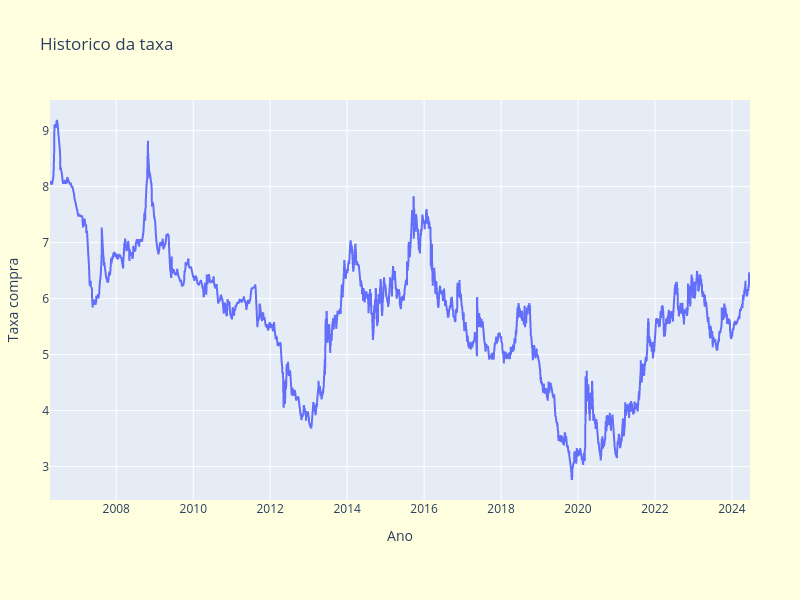

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=hist.index , y=hist['Taxa Compra Manha']))
fig.update_layout(
    title="Historico da taxa",
    xaxis_title="Ano",
    yaxis_title="Taxa compra",
    height=600,
    width=800,
    margin=dict(l=50, r=50, t=100, b=100),
    paper_bgcolor="LightYellow"
)
fig.show()

Vendas de titulos do tesouro

In [9]:
def vendas_tesouro(tipo=None):
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  df.sort_index(inplace=True)
  if tipo is None:
    return df
  else:
    return df[df.index.get_level_values(0) == tipo]


In [10]:
vendas = vendas_tesouro()
vendas


PU  Quantidade  \
Tipo Titulo    Vencimento do Titulo Data Venda                             
Tesouro Educa+ 2030-12-15           2023-08-02   3248.250572      331.84   
                                    2023-08-03   3250.646532      183.44   
                                    2023-08-04   3260.006540      157.49   
                                    2023-08-07   3260.737100      360.67   
                                    2023-08-08   3263.770709      227.79   
...                                                      ...         ...   
Tesouro Selic  2029-03-01           2024-06-17  14853.161439     3588.83   
                                    2024-06-18  14858.865362     4702.76   
                                    2024-06-19  14864.449818     3703.83   
                                    2024-06-20  14870.044756     3529.31   
                                    2024-06-21  14875.964475     4028.21   

                                                      Valor  
Tipo Titulo    Vencimento do Titulo Data Venda               
Tesouro Educa+ 2030-12-15           2023-08-02   1077899.46  
                                    2023-08-03    596298.59  
                                    2023-08-04    513418.42  
                                    2023-08-07   1176050.04  
                                    2023-08-08    743454.32  
...                                                     ...  
Tesouro Selic  2029-03-01           2024-06-17  53305471.36  
                                    2024-06-18  69877677.66  
                                    2024-06-19  55055395.16  
                                    2024-06-20  52480997.65  
                                    2024-06-21  59923508.85  

[80330 rows x 3 columns]

In [11]:
selic= vendas_tesouro('Tesouro Selic').reset_index(level=[0, 1], drop=True)

In [12]:
selic

,PU,Quantidade,Valor
Data Venda,,,
2002-01-07,1263.007692,2.60,3283.81
2002-01-08,1263.900000,7.60,9605.64
2002-01-09,1264.790000,6.00,7588.74
2002-01-11,1266.821052,3.80,4813.91
2002-01-14,1267.707500,4.00,5070.83
...,...,...,...
2024-06-17,14853.161439,3588.83,53305471.36
2024-06-18,14858.865362,4702.76,69877677.66
2024-06-19,14864.449818,3703.83,55055395.16


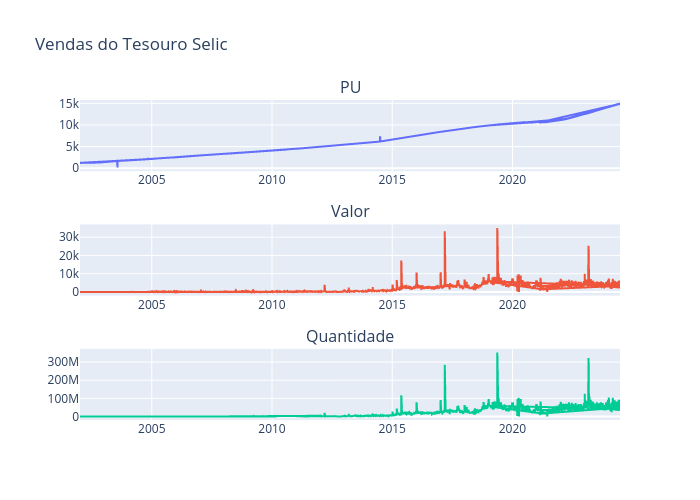

In [13]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("PU", "Valor" , 'Quantidade'))

# Adicionando os traces aos subplots
fig.add_trace(go.Scatter(x=selic.index, y=selic['PU'], mode='lines', name='Dados 1'), row=1, col=1)
fig.add_trace(go.Scatter(x=selic.index, y=selic['Quantidade'], mode='lines', name='Dados 2'), row=2, col=1)
fig.add_trace(go.Scatter(x=selic.index, y=selic['Valor'], mode='lines', name='Dados 2'), row=3, col=1)

# Configurando o layout
fig.update_layout(title="Vendas do Tesouro Selic", showlegend=False)



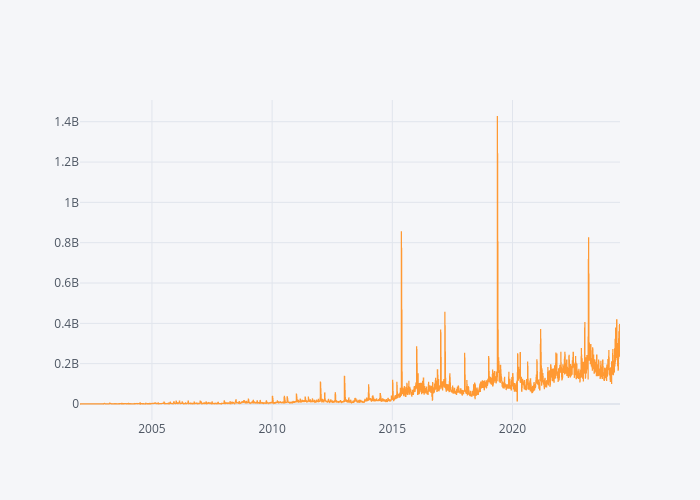

In [14]:
vendas['Valor'].groupby('Data Venda').sum().iplot()

recompra -- títulos resgatados antes do vencimento

In [15]:
def recompras():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :2])
  df = df.set_index(multi_indice).iloc[: , 2:]  
  return df.sort_index()

In [16]:
resgate = recompras()
resgate

Data Resgate  Quantidade        Valor
Tipo Titulo    Vencimento do Titulo                                      
Tesouro Educa+ 2030-12-15             2024-03-15       44.39    148924.58
               2030-12-15             2024-03-12       37.96    127698.52
               2030-12-15             2024-04-15       30.53    102000.12
               2030-12-15             2024-02-27        9.29     31056.34
               2030-12-15             2024-02-28       23.78     79609.85
...                                          ...         ...          ...
Tesouro Selic  2029-03-01             2023-11-09     1575.14  21930691.23
               2029-03-01             2023-11-29     1686.19  23610858.82
               2029-03-01             2023-12-12     1874.24  26365086.74
               2029-03-01             2024-04-23     2305.66  33740503.60
               2029-03-01             2023-10-27     1587.32  22018341.74

[70398 rows x 3 columns]

In [17]:
selic = resgate.loc['Tesouro Selic']
selic

,Data Resgate,Quantidade,Valor
Vencimento do Titulo,,,
2005-02-16,2005-01-20,20.60,44929.63
2005-02-16,2005-01-27,93.20,203952.36
2005-02-16,2005-02-03,20.60,45229.97
2005-02-16,2005-02-10,24.00,52800.48
2005-02-16,2005-01-06,10.60,22969.46
...,...,...,...
2029-03-01,2023-11-09,1575.14,21930691.23
2029-03-01,2023-11-29,1686.19,23610858.82
2029-03-01,2023-12-12,1874.24,26365086.74


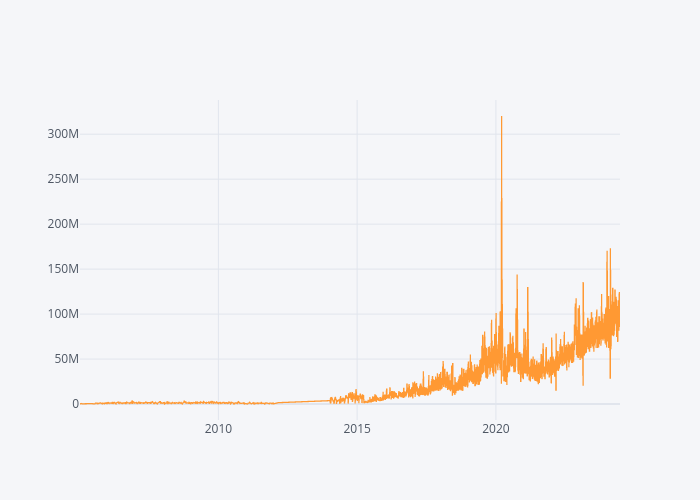

In [18]:
selic.groupby('Data Resgate').sum().Valor.iplot()

Venda semanal Tesouro Selic X retorno Ibov

In [19]:
selic_semanal = selic.reset_index(level=[0], drop=True)
selic_semanal.set_index('Data Resgate', inplace=True)
selic_semanal = selic_semanal.resample('W').sum()
selic_semanal

,Quantidade,Valor
Data Resgate,,
2005-01-09,109.40,2.363506e+05
2005-01-16,203.40,4.414528e+05
2005-01-23,263.60,5.713181e+05
2005-01-30,238.80,5.209024e+05
2005-02-06,83.00,1.814714e+05
...,...,...
2024-05-26,28454.83,4.212745e+08
2024-06-02,27666.89,4.103924e+08
2024-06-09,32518.26,4.831437e+08


In [20]:
ibov = yf.download('^BVSP')['Adj Close'].resample('W').last().pct_change()[1:]

[*********************100%%**********************]  1 of 1 completed


In [21]:
selic_ibov = pd.concat([selic_semanal['Valor'].pct_change()[1:], ibov], axis=1).dropna()[1:]
selic_ibov.columns = ['Recompra(%)', 'IBOV(%)']
selic_ibov

,Recompra(%),IBOV(%)
2005-01-23,0.294177,-0.044375
2005-01-30,-0.088244,0.006298
2005-02-06,-0.651621,0.073598
2005-02-13,-0.238354,0.036492
2005-02-20,1.648852,0.003187
...,...,...
2024-05-26,-0.009502,-0.030004
2024-06-02,-0.025831,-0.017763
2024-06-09,0.177273,-0.010901
2024-06-16,0.111270,-0.009150


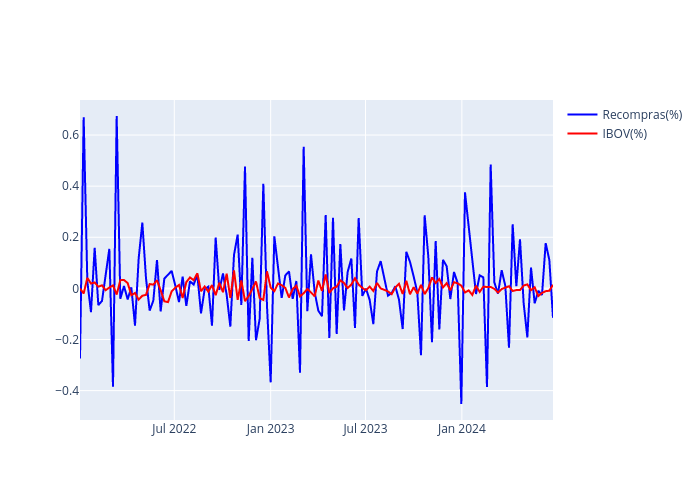

In [22]:
selic_ibov = selic_ibov[selic_ibov.index >'2022']

fig = go.Figure()
fig.add_trace(go.Scatter(name='Recompras(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)'],marker=dict(color='blue')))
fig.add_trace(go.Scatter(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)'],marker=dict(color='red')))
fig.update_layout(barmode='group')
fig.show()
     

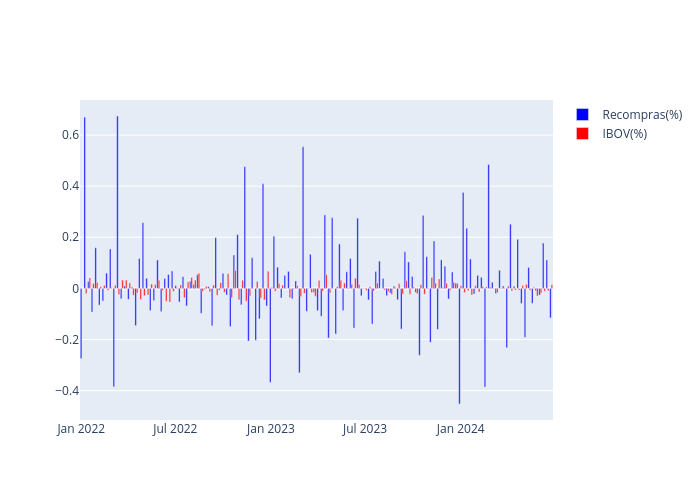

In [23]:

fig = go.Figure()
fig.add_trace(go.Bar(name='Recompras(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)'],marker=dict(color='blue')))
fig.add_trace(go.Bar(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)'],marker=dict(color='red')))
fig.update_layout(barmode='group')
fig.show()
     